In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [34]:
poll_analysis_experience = '/Users/churnika/Desktop/Projects/ML-Crate/LinkedIn Poll Data Analysis/Dataset/LIQuizPollData%20-%20Sheet1%20(2).csv'
poll_data = pd.read_csv(poll_analysis_experience)
poll_data = poll_data.dropna()
poll_data.describe()

,Quiz_number,Total_Views,Total_Responses,Right_Answers,Total_Likes
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,60214.630000,874.240000,509.360000,36.110000
std,29.011492,26489.886212,756.884111,509.713319,18.822346
min,1.000000,24307.000000,157.000000,37.000000,10.000000
25%,25.750000,44482.750000,448.250000,191.500000,24.000000
50%,50.500000,52106.500000,638.500000,389.500000,32.000000
75%,75.250000,72124.000000,1026.250000,661.000000,43.500000
max,100.000000,172686.000000,5669.000000,4093.000000,139.000000


In [35]:
poll_data.columns

Index(['Quiz_number', 'Total_Views', 'Total_Responses', 'Right_Answers',
       'Total_Likes', 'Avg_right', 'Max_Right'],
      dtype='object')

In [36]:
poll_data['Popularity'] = poll_data['Total_Responses']/poll_data['Total_Views']

In [37]:
poll_data = poll_data.drop('Quiz_number',axis=1)

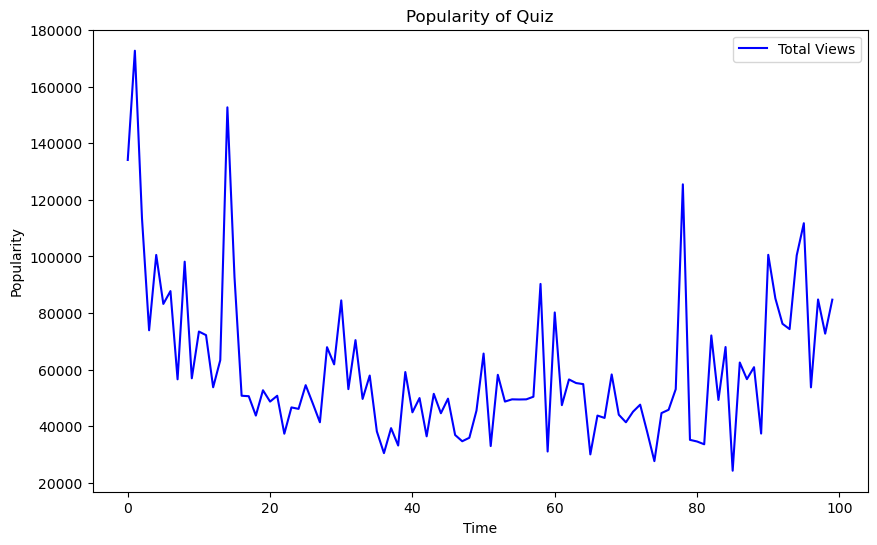

In [38]:
#  PLOTTING ALL THE POPULARITY (TOTAL_VIEWS)

plt.figure(figsize=(10,6))
plt.plot(poll_data['Total_Views'], label='Total Views', color='blue')
plt.title(f'Popularity of Quiz')
plt.xlabel('Time')
plt.ylabel('Popularity')
plt.legend()
plt.show()

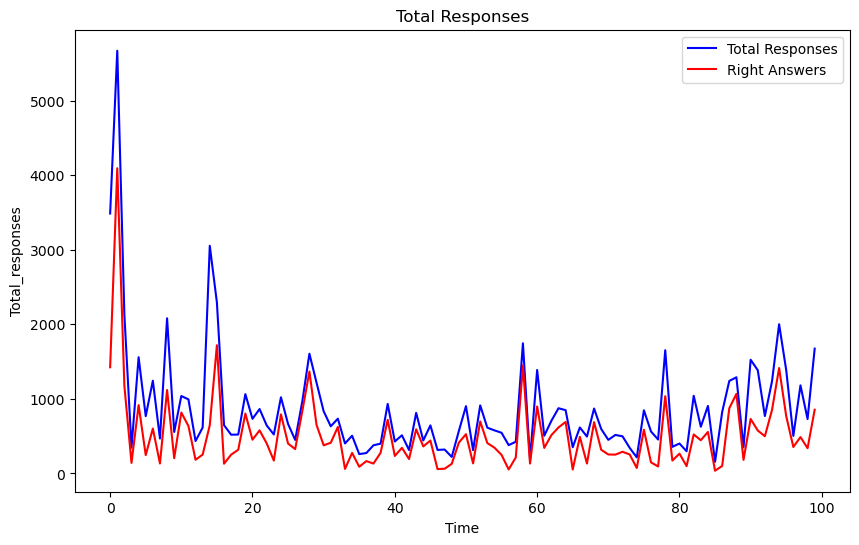

In [39]:
plt.figure(figsize=(10,6))
plt.plot(poll_data['Total_Responses'],label='Total Responses', color='blue')
plt.plot(poll_data['Right_Answers'],label='Right Answers',color='red')
plt.title(f'Total Responses')
plt.xlabel('Time')
plt.ylabel('Total_responses')
plt.legend()
plt.show()

In [40]:
# CHECKING FOR DUPLICATES
print(poll_data.duplicated().sum())

0


In [41]:
# NORMALIZING
poll_data['Max_Right'] = poll_data['Max_Right'].map({'Yes': 1, 'No': 0})
poll_data['Avg_right'] = poll_data['Avg_right'].str.rstrip('%').astype('float')/100

/Users/churnika/anaconda3/envs/my_project_env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


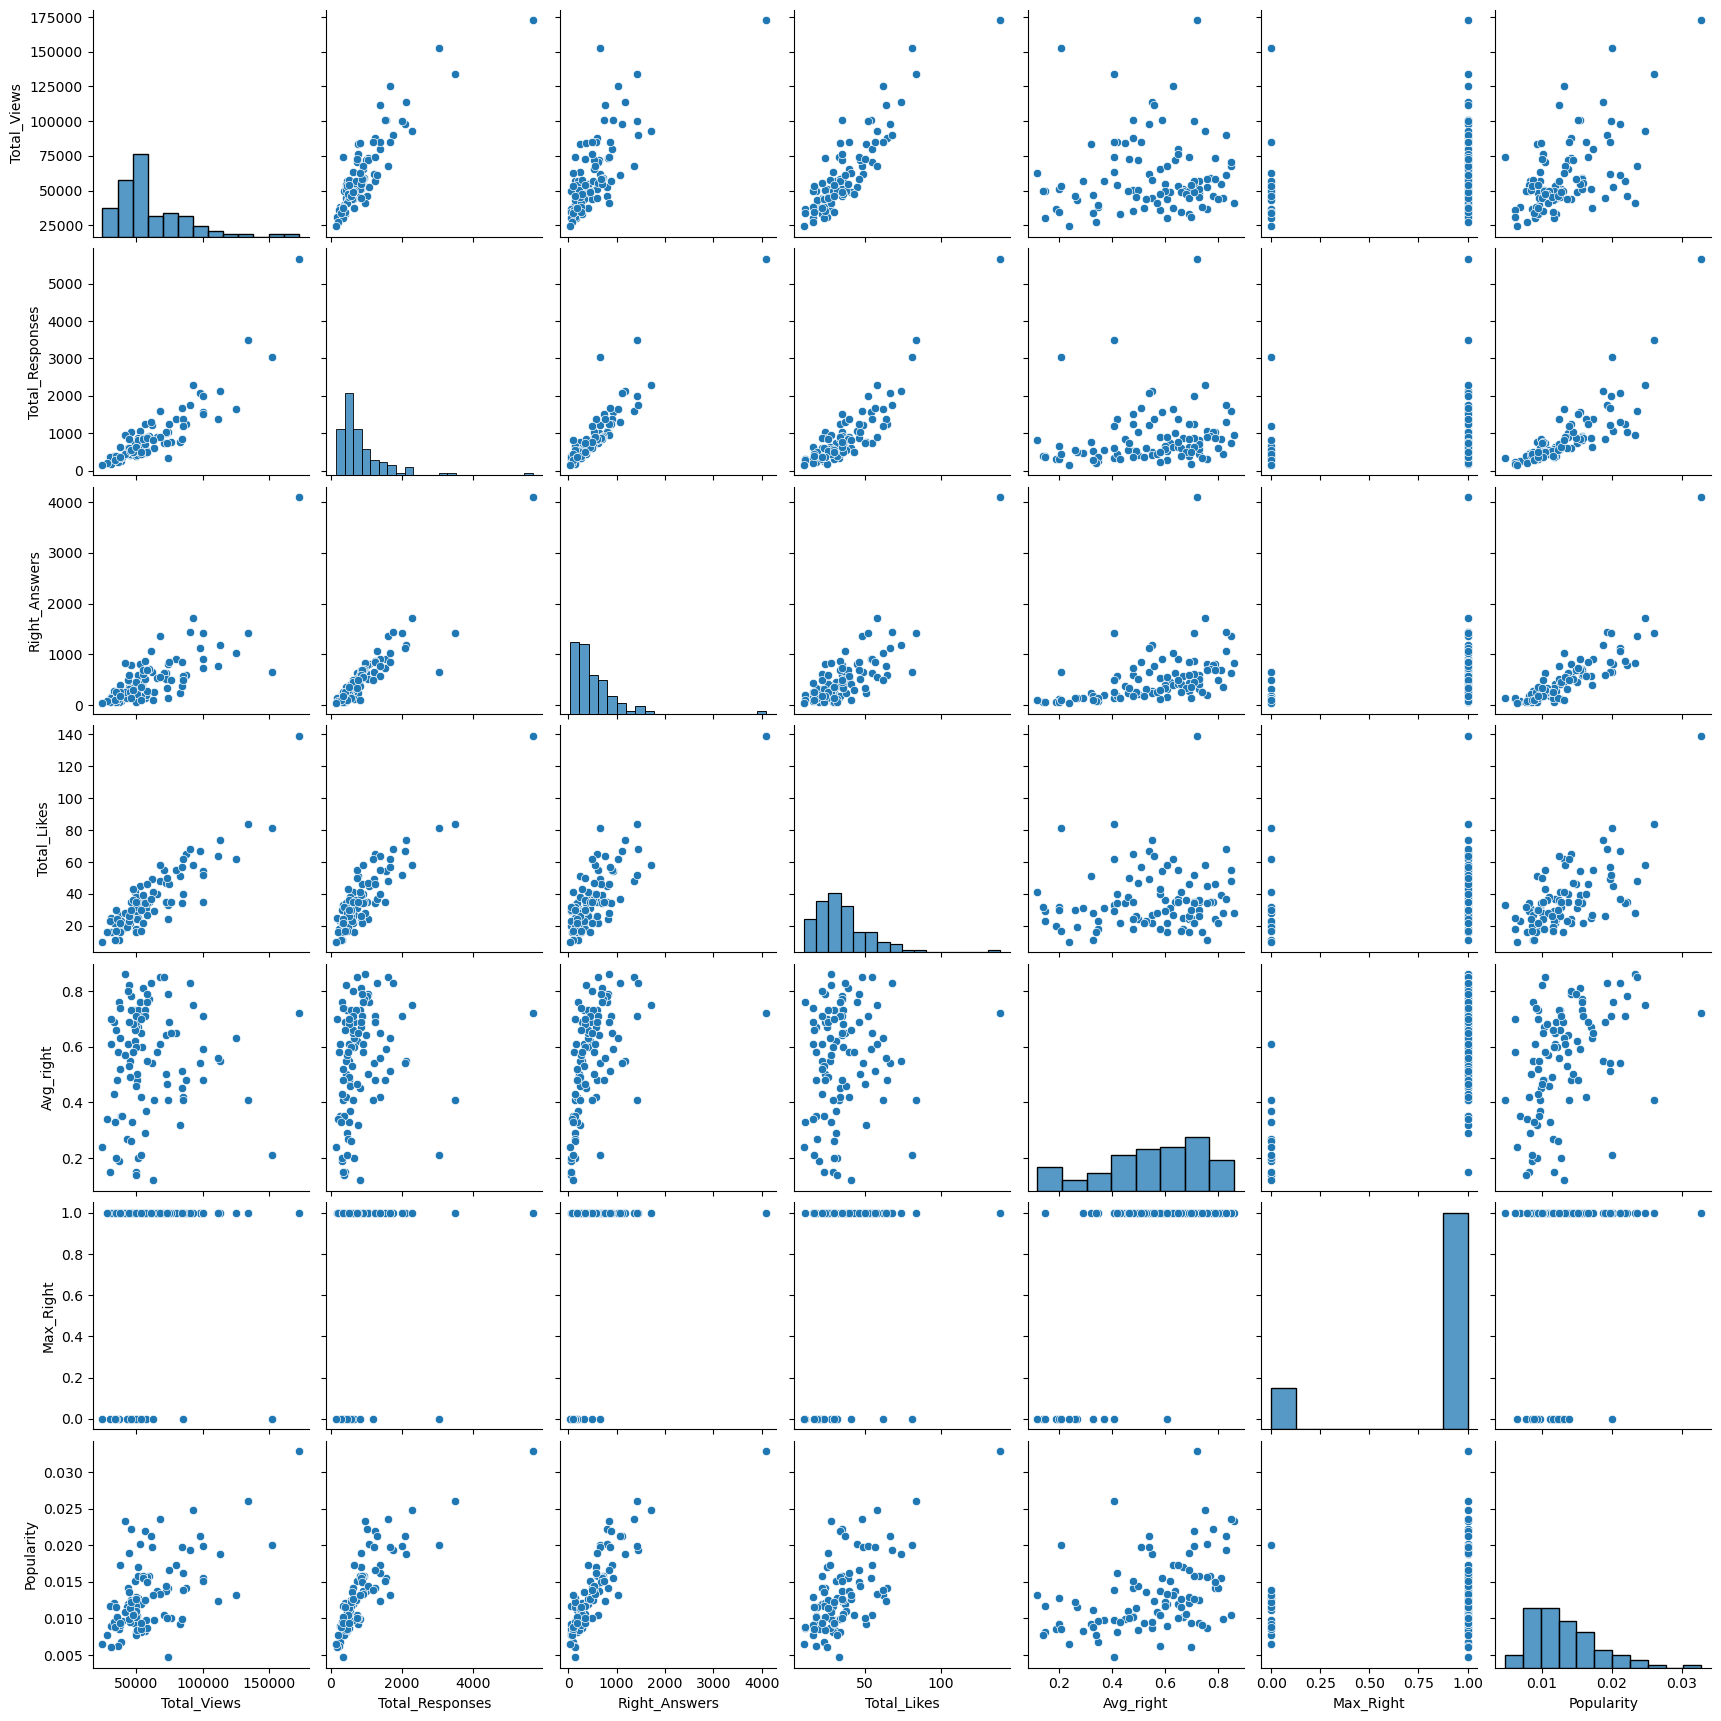

In [42]:
sns.pairplot(poll_data)

<Axes: >

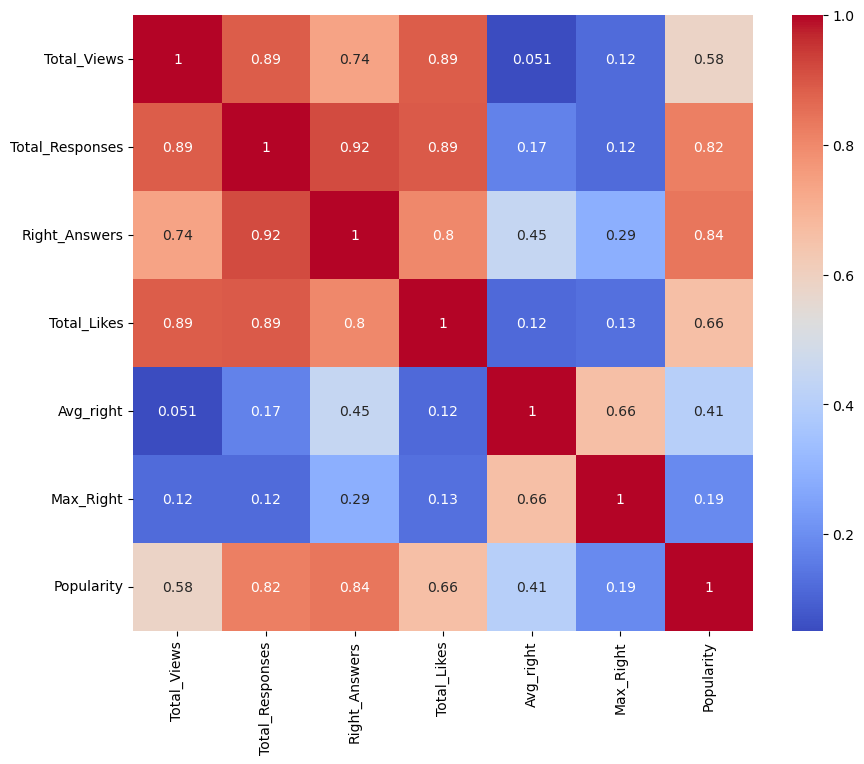

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(poll_data.corr(),annot=True,cmap='coolwarm')

USING LINEAR REGRESSION

Mean Absolute Error (MAE): 8757.9728
Mean Squared Error (MSE): 126278489.2206
Root Mean Squared Error (RMSE): 11237.3702
R2 Score: 0.8033


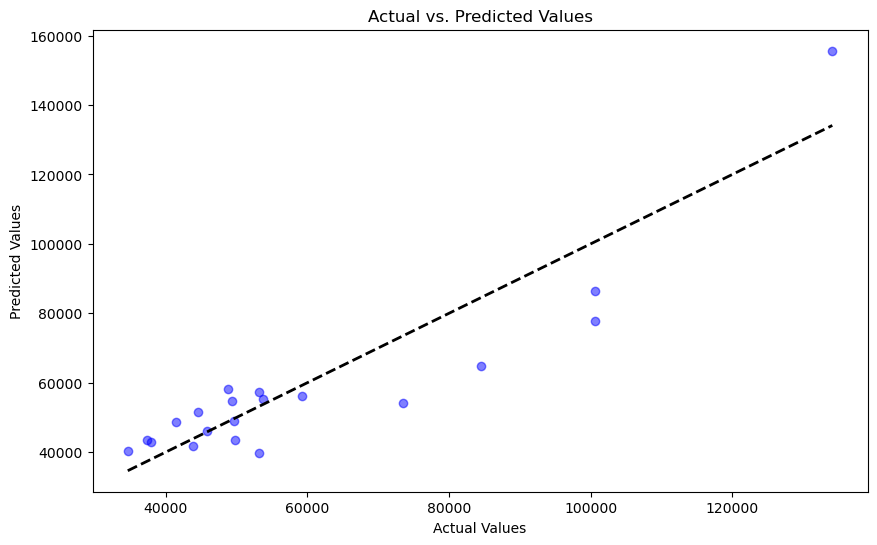

In [44]:
# X = poll_data.drop('Max_Right', axis=1)
X = poll_data.drop('Total_Views', axis=1)
y = poll_data['Total_Views']
# y = poll_data['Max_Right']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test,preds)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

USING DECISION TREE

In [45]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
preds = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Squared Error (MSE): 124600626.3500
R-squared (R2) Score: 0.8059


RANDOM FOREST REGRESSOR

In [46]:
param_grid = {
    'n_estimators': [200, 400, 500],
    'max_depth': [None, 15, 25],
    'min_samples_split': [12, 15, 10],
    'min_samples_leaf': [1, 4, 6]
}

random_regressor = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(estimator=random_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
preds2 = best_model.predict(X_test)

# random_regressor.fit(X_train, y_train)
# preds2 = random_regressor.predict(X_test)

mse = mean_squared_error(y_test, preds2)
r2 = r2_score(y_test, preds2)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (MSE): 123862333.4716
R-squared (R2) Score: 0.8070


Mean Squared Error (MSE): 684134548.8000
R-squared (R2) Score: -0.0659


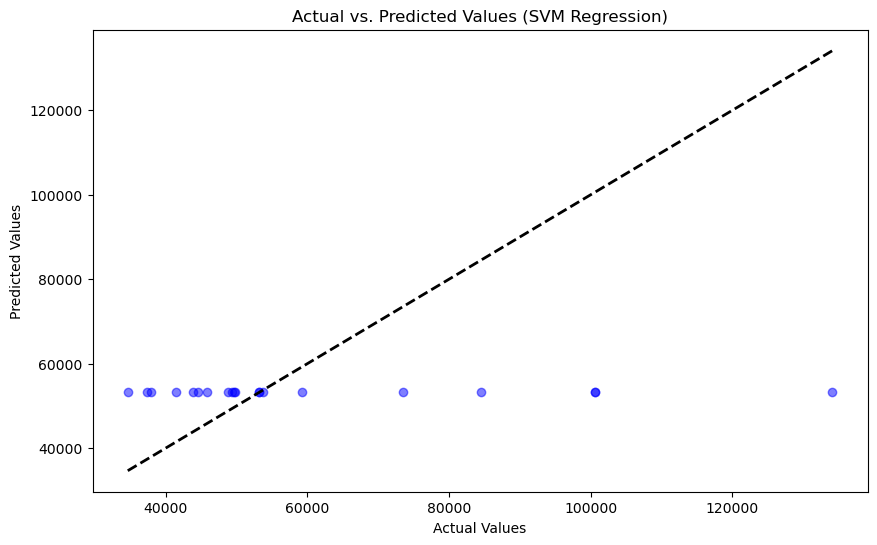

In [47]:
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train, y_train)
preds = svm_regressor.predict(X_test)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (SVM Regression)')
plt.show()

In [48]:
print(poll_data)

    Total_Views  Total_Responses  Right_Answers  Total_Likes  Avg_right  \
0        134100             3486           1424           84     0.4100   
1        172686             5669           4093          139     0.7200   
2        113495             2128           1175           74     0.5500   
3         73924              347            142           33     0.4100   
4        100538             1559            917           54     0.5900   
..          ...              ...            ...          ...        ...   
95       111743             1385            769           64     0.5600   
96        53757              504            355           30     0.7000   
97        84803             1182            488           62     0.4100   
98        72729              730            339           50     0.4644   
99        84737             1674            855           57     0.5108   

    Max_Right  Popularity  
0           1    0.025996  
1           1    0.032828  
2           1  